In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("activity_log.csv",sep=",")
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [3]:
df["Activity Type"].unique()

array(['Running', 'Cardio', 'Treadmill Running'], dtype=object)

In [4]:
def parse_time_string(s):
    try:
        s = s.strip()
        parts = s.split(':')
        if len(parts) == 3:
            # HH:MM:SS(.fff)
            return pd.to_timedelta(s)
        elif len(parts) == 2:
            # MM:SS(.fff) → lo pasamos como '00:MM:SS(.fff)'
            return pd.to_timedelta(f"0:{s}")
        else:
            return pd.NaT
    except Exception:
        return pd.NaT

In [5]:
df["Time_parsed"] = df["Time"].apply(parse_time_string)
df["Time_seconds"] = df["Time_parsed"].dt.total_seconds()

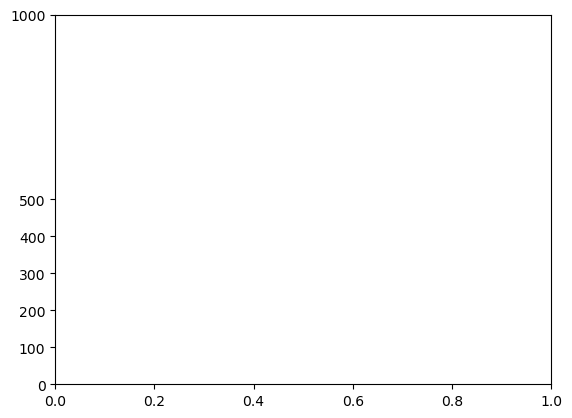

In [6]:
axtest = plt.gca()
# set the positions where we want ticks to appear
axtest.yaxis.set_ticks([0,100,200,300,400,500,1000])

In [33]:
ritmo = df["Avg Pace"]
cadencia = df["Avg Run Cadence"]

Text(0, 0.5, '')

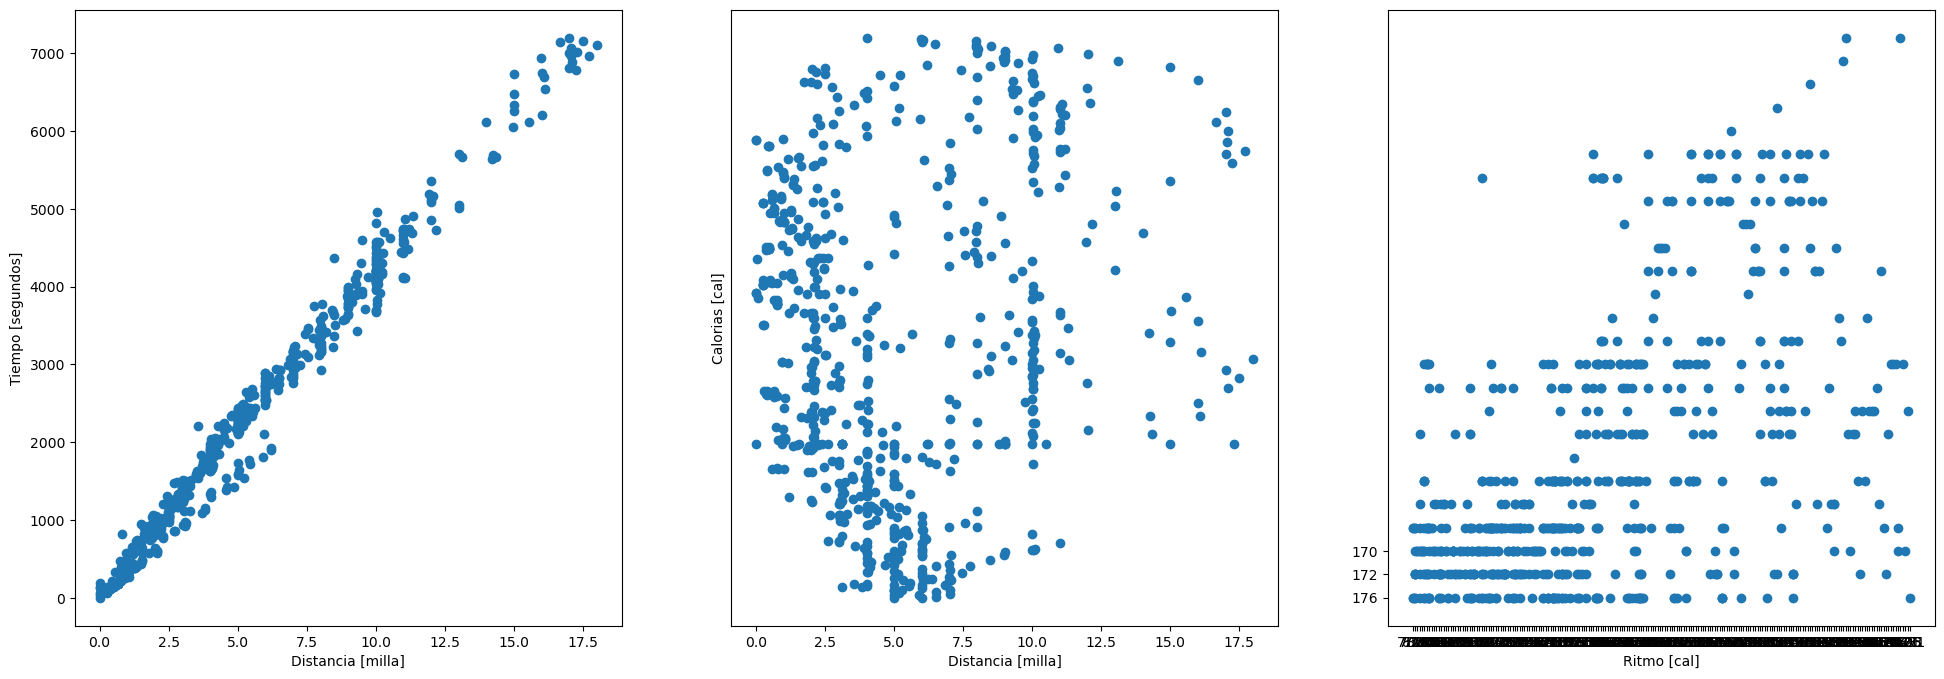

In [35]:
fig,ax = plt.subplots(1,3,figsize=(24,8))

ax[0].scatter(df["Distance"],df["Time_seconds"])
ax[0].set_xlabel("Distancia [milla]")
ax[0].set_ylabel("Tiempo [segundos]")


ax[1].set_yticks([])
ax[1].scatter(df["Distance"],df["Calories"])
ax[1].set_xlabel("Distancia [milla]")
ax[1].set_ylabel("Calorias [cal]")

ax[2].set_yticks([0,1,2])
ax[2].scatter(df["Avg Pace"],df["Avg Run Cadence"])
ax[2].set_xlabel("Ritmo [cal]")
ax[2].set_ylabel("")
